In [236]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import datetime as dt
import pandas as pd
import numpy as np
from scipy import stats

In [237]:
import numpy as np
import pandas as pd

In [238]:
# Reflect Tables into SQLAlchemy ORM

In [239]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect
from flask import Flask, jsonify

In [240]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [241]:
inspector= inspect(engine)

In [242]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [243]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [244]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [245]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [248]:
#get column names and types for measurement table
columns = inspector.get_columns('measurement')
for m in columns:
    print(m['name'], m["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [249]:
#get column names and types for station table
columns = inspector.get_columns('station')
for m in columns:
    print(m['name'], m["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [250]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [255]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

max_date = session.query(Measurement.prcp, Measurement.date).\
    order_by(Measurement.date.desc()).first()
print(max_date)

(0.0, '2017-08-23')


In [200]:
min_date = session.query(Measurement.prcp, Measurement.date).\
    order_by(Measurement.date.asc()).first()
print(min_date)

(0.08, '2010-01-01')


In [305]:
#Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [306]:
#Unpacking results by performing a query to retrieve the data and precipitation scores
meas_prcp= session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date>=query_date).\
    order_by(Measurement.date).all()

In [307]:
#Unpacking results by performing a query to retrieve the data and precipitation scores
meas_prcp= session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date>=query_date).\
order_by(Measurement.date).all()

In [308]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df =pd.DataFrame(meas_prcp,columns=['date', 'prcp'])
prcp_df.set_index('date', inplace=True)
dict_df = prcp_df.to_dict()["prcp"]
prcp_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [309]:
#drop nan
prcp_df= prcp_df.dropna()

prcp_df.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


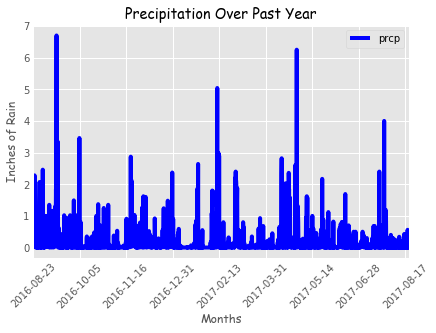

In [314]:

# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot(color= "blue")
plt.title('Precipitation Over Past Year', fontname= 'Comic Sans MS')
plt.xlabel('Months', fontname= 'Comic Sans MS')
plt.ylabel('Inches of Rain', fontname= 'Comic Sans MS')
plt.xticks(rotation=45)
plt.savefig('../prcp_year.png')
plt.show()

In [280]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [281]:
# Design a query to show how many stations are available in this dataset?

total_stations= session.query(Measurement.station).group_by(Measurement.station).count()
print(f'There are {total_stations} stations in the dataset.')

There are 9 stations in the dataset.


In [282]:
# find the most active stations/ (i.e. stations have the most rows) List in descending order
active_stations= session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station). \
order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [283]:
#lowest, highest and average temps from most active station
sel = [Measurement.station, 
       func.min(Measurement.tobs),
      func.max(Measurement.tobs),
    func.avg(Measurement.tobs)]

active_stats=session.query(*sel).group_by(Measurement.station). \
order_by(func.count(Measurement.station).desc()).first()

In [267]:
active_stats

('USC00519281', 54.0, 85.0, 71.66378066378067)

In [268]:
# Choose the station with the highest number of temperature observations.
#Query last 12 months from this station of temperature data
most_obs= active_stats[0]

most_obs_query=session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station==most_obs).\
filter(Measurement.date>=query_date).\
order_by(Measurement.date).all()
print(most_obs) 

USC00519281


In [269]:

#print(most_obs_query)


In [270]:
#plot the results from query as a histogram

most_obs_df=pd.DataFrame(most_obs_query,columns=['date','tobs'])
most_obs_df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


<function matplotlib.pyplot.show(*args, **kw)>

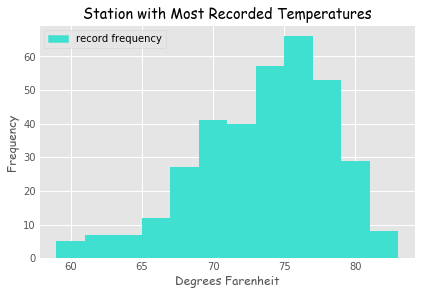

In [311]:
most_obs_df.plot.hist(bins=12, color='turquoise')


t_patch = mpatches.Patch(color='turquoise', label='record frequency')
plt.legend(handles=[t_patch])
plt.xlabel("Degrees Farenheit",fontname='Comic Sans MS')
plt.ylabel("Frequency", fontname='Comic Sans MS')
plt.title("Station with Most Recorded Temperatures", fontname='Comic Sans MS')
plt.savefig('../mosttemps.png')
plt.show

In [215]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# # Use your previous calc_temps for a previous year to find data on my trip's dates.
print(calc_temps('2017-05-01', '2017-05-10'))

[(65.0, 75.12280701754386, 80.0)]


In [216]:
temp_stats = ['Minimum Temp', 'Average Temp', 'Max Temp']
temps = [65, 75, 80]
x_axis = np.arange(len(temp_stats))

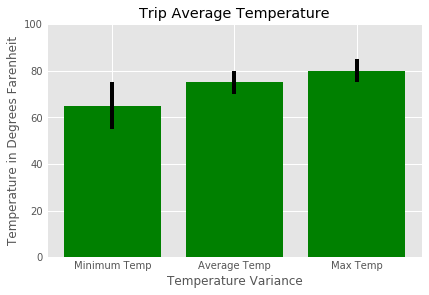

In [310]:
# Plot the results from your previous query as a bar chart. 
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.style.use('ggplot')
x = ['Minimum Temp', 'Average Temp', 'Max Temp']
temps = [65, 75, 80]
x_axis = np.arange(len(x))
variance= [10, 5, 5]
x_pos = [i for i, _ in enumerate(x)]
plt.xticks(x_pos, x)
plt.ylim(0, 100)
plt.bar(x_pos, temps, color='green', yerr=variance)
plt.xlabel("Temperature Variance")
plt.ylabel("Temperature in Degrees Farenheit")
plt.title("Trip Average Temperature")
plt.savefig('../tripavg.png')
plt.show()

In [218]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# Check relationships
session.query(Measurement.station,Station.station).filter(Measurement.station==Station.station).all()
session.query(Measurement.id,Station.id).filter(Measurement.station==Station.station).all()

# Check number of total records match
session.query(Measurement.station).count()
session.query(Measurement.station,Station.station).filter(Measurement.station==Station.station).count()


19550

In [219]:
# Finally do Join and Calculate rainfall per weather station for our trip!

trip_rainfall_per_station= session.query(Station.station, Station.name, Station.latitude,
                                 Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
        filter(Measurement.date >= '2017-05-01', Measurement.date <= '2017-05-10').\
        filter(Measurement.prcp != None).\
        filter(Station.station == Measurement.station).\
        group_by(Measurement.station).\
        order_by(func.sum(Measurement.prcp).desc()).all()
print(trip_rainfall_per_station)

[('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 2.68), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 2.2700000000000005), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 2.07), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 1.94), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.81), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.26)]


In [220]:
## Optional Challenge Assignment
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals('%m-%d')

[(None, None, None)]

In [221]:
# Set the start and end date of the trip/ Use the start and end date to create a range of dates, strip off the year 
##and save a list of %m-%d string
start_date = dt.datetime.strptime('2017-05-01', "%Y-%m-%d")
end_date = dt.datetime.strptime('2017-05-10', "%Y-%m-%d")

In [222]:
# push each tuple of calculations into a list called `normals`
normals = []
dt_list = []
# Loop through the list of %m-%d strings and calculate the normals for each date
trip_date = start_date
while trip_date <= end_date:
    dt_list.append(trip_date)
    st_str_dt = trip_date.strftime("%m-%d")
    #print(st_str_dt)
    trip_date += dt.timedelta(1)
    normals.append(*daily_normals(st_str_dt))

#dt_list
normals

[(65.0, 72.75925925925925, 79.0),
 (65.0, 73.05084745762711, 79.0),
 (67.0, 73.41071428571429, 84.0),
 (65.0, 73.59649122807018, 78.0),
 (67.0, 73.39655172413794, 79.0),
 (66.0, 73.14035087719299, 80.0),
 (64.0, 71.78846153846153, 79.0),
 (65.0, 72.18867924528301, 80.0),
 (67.0, 72.9322033898305, 79.0),
 (64.0, 73.3157894736842, 78.0)]

In [223]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df=pd.DataFrame(normals, columns=['tmin','tavg','tmax'])
normals_df['Date'] = pd.to_datetime(dt_list)
normals_df.set_index('Date', inplace=True)
normals_df

,tmin,tavg,tmax
Date,,,
2017-05-01,65.0,72.759259,79.0
2017-05-02,65.0,73.050847,79.0
2017-05-03,67.0,73.410714,84.0
2017-05-04,65.0,73.596491,78.0
2017-05-05,67.0,73.396552,79.0
2017-05-06,66.0,73.140351,80.0
2017-05-07,64.0,71.788462,79.0
2017-05-08,65.0,72.188679,80.0
2017-05-09,67.0,72.932203,79.0


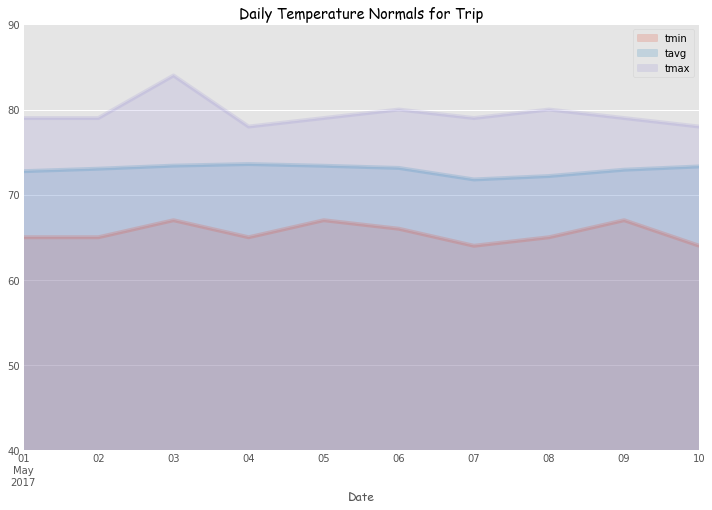

In [224]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot.area(stacked=False, alpha=0.2,figsize=(10,7))
plt.xlabel("Date", fontname= 'Comic Sans MS')
plt.ylim(40, 90)
plt.tight_layout()
plt.title('Daily Temperature Normals for Trip', fontname= 'Comic Sans MS')
plt.savefig('../daily_normals.png')